In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)






df1 = pd.read_csv('./data/서울시 인구현황_구.txt', sep='\t', header=1)
df1=df1.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,-1]]
df1.drop(0, inplace=True)

col_name=['년도', '자치구', '총인구', '총인구(남)', '총인구(여)', '내국인', '내국인(남)', '내국인(여)',
          '외국인', '외국인(남)','외국인(여)', '65세이상']
for i in range(len(col_name)):
    df1.rename(columns={df1.columns[i]:col_name[i]}, inplace=True)

df2=df1.iloc[:, [0,1,2,5,6,7,8,9,10,11]]

for row_i in df2.index:
    df2.loc[row_i, "총인구"]=df2.loc[row_i, "총인구"].replace(",","")
    df2.loc[row_i, "내국인"]=df2.loc[row_i, "내국인"].replace(",", "")
    df2.loc[row_i, "외국인"]=df2.loc[row_i, "외국인"].replace(",", "")
    df2.loc[row_i, "외국인(남)"]=df2.loc[row_i, "외국인(남)"].replace(",", "")
    df2.loc[row_i, "외국인(여)"]=df2.loc[row_i, "외국인(여)"].replace(",", "")
    df2.loc[row_i, "65세이상"]=df2.loc[row_i, "65세이상"].replace(",", "")

df2=df2[df2['내국인'] != "…"] # 1991년 데이터 제거

df2=df2.astype({'총인구':int, '내국인':int,'외국인':int,'65세이상':int,"외국인(남)":int,"외국인(여)":int})




C:\Users\user1\miniconda3\envs\multi\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user1\miniconda3\envs\multi\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


조회 년도를 입력하시요: 2011


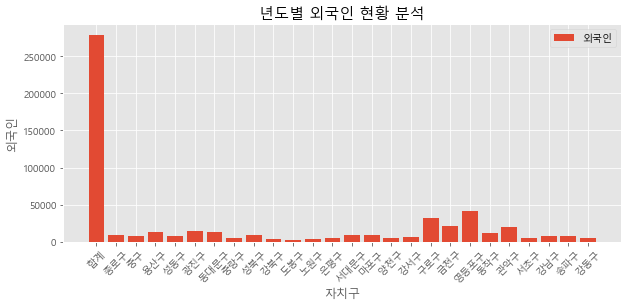

In [158]:
### 년도별 인구현황 분석
### 1.사용자가 입력된 년도의 데이터를 이용해 외국인 현황
### 2.x축으로 자치구,
### 3.막대그래프, 제목, x/y 축 제목

### 4, 외국인 남성/여성의 구성비율(자치구 별 확인)


year=input('조회 년도를 입력하시요: ')
df3=df2[df2['년도']==year]

plt.figure(figsize=(10, 4))

plt.xticks(size=10, rotation=45)
plt.bar(df3['자치구'],df3['외국인'], label='외국인',)


plt.legend()
plt.title('년도별 외국인 현황 분석', size=15)
plt.xlabel('자치구')
plt.ylabel('외국인')

plt.show()

조회 년도를 입력하시요: 2003
조회구를 입력하세요: 은평구


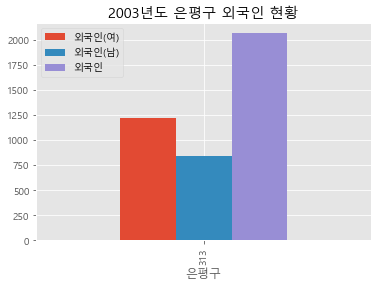

In [163]:
year=input('조회 년도를 입력하시요: ')
df3=df2[df2['년도']==year]
gu=input('조회구를 입력하세요: ')
df4=df3[df3['자치구']==gu]

df4[{'외국인', '외국인(남)', '외국인(여)'}].plot(kind='bar', title=year+"년도 "+gu+" 외국인 현황", xlabel=gu)


plt.show()
